In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np
from sklearn.impute import KNNImputer


In [22]:
features = "C:\\Users\\danie\\OneDrive\\Área de Trabalho\\Python BRAIN\\Repotório github\\Teste\\Desafios\\Titanic\\data\\train.csv"

In [23]:
tf = pd.read_csv(features)
X = tf[["Pclass", "Age", "Fare"]]
y = tf["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [24]:
# age_mean = tf["Age"].mean()

# tf["Age"].fillna(age_mean, inplace=True)

# string_columns = tf.select_dtypes(include=['object']).columns

# tf[string_columns] = tf[string_columns].fillna(tf[string_columns].mode().iloc[0])
nan = np.nan
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer.fit_transform(X)

# print(tf)

array([[ 3.    , 22.    ,  7.25  ],
       [ 1.    , 38.    , 71.2833],
       [ 3.    , 26.    ,  7.925 ],
       ...,
       [ 3.    , 30.    , 23.45  ],
       [ 1.    , 26.    , 30.    ],
       [ 3.    , 32.    ,  7.75  ]])

In [25]:
# print(tf['Fare'].isnull().sum())

In [28]:
# clf = Pipeline(
#     steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
# )
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
clf = HistGradientBoostingClassifier().fit(X, y)

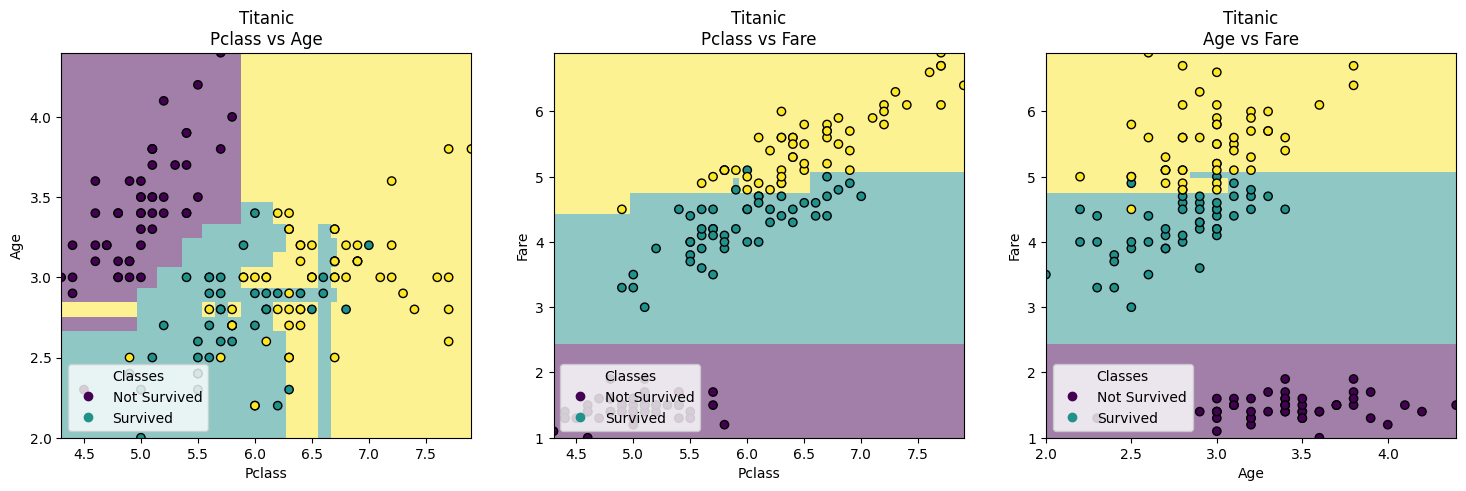

In [35]:
fig, axs = plt.subplots(ncols=3, figsize=(18, 5))

# Define the feature names and target names
feature_names = ['Pclass', 'Age', 'Fare']
target_names = ['Not Survived', 'Survived']

# Define classifier with default parameters
clf = HistGradientBoostingClassifier()

for ax, feature_index in zip(axs, [(0, 1), (0, 2), (1, 2)]):
    clf.fit(X[:, feature_index], y)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X[:, feature_index],
        response_method="predict",
        plot_method="pcolormesh",
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = ax.scatter(X[:, feature_index[0]], X[:, feature_index[1]], c=y, edgecolors="k")
    ax.legend(
        scatter.legend_elements()[0],
        target_names,
        loc="lower left",
        title="Classes",
    )
    ax.set_xlabel(feature_names[feature_index[0]])
    ax.set_ylabel(feature_names[feature_index[1]])
    ax.set_title(f"Titanic\n{feature_names[feature_index[0]]} vs {feature_names[feature_index[1]]}")

    # Adjusting the limits of the axes
    ax.set_xlim([np.min(X[:, feature_index[0]]), np.max(X[:, feature_index[0]])])
    ax.set_ylim([np.min(X[:, feature_index[1]]), np.max(X[:, feature_index[1]])])

plt.show()